# 3. (Low Complexity) Halfar Dome Unit Test
a. Refer to Section 8.1.1 Halfar dome in the CISM documentation. Extract the relevant
equations to model a dome of ice analytically. Further reading can be found at Halfar 1984 and in Buehler’s notes (provided as a file in the starter kit). Parts b and c are based off of the CISM documentation.

• The general shallow ice approximation (SIA) ice evolution equation is 𝛿𝐻 = ∇ ∙ 𝛿𝑡
(Γ𝐻𝑛+2|∇𝐻|𝑛−1∇𝐻).
• The Glen flow law exponent, n, is usually n = 3. G is defined as: Γ = 2/(n+2) * 𝐴(𝜌𝑔)𝑛/(𝑛+2)
• Set acceleration g = 9.8 m/s2, A = 1 x 10-16 Pa-3/s, and density r = 910 kg/m3,
1 73𝑅4 whicharethevaluesusedbyCISM.Wecandefine𝑡 = ( )   0.
• Using these definitions, the time dependent solution of the SIA using Halfar’s 
approximationis:𝐻(𝑡,𝑟)=𝐻0(𝑡0/t)^1/9 *[1-((r/R0)*(t0/t)^1/18)^4/3]^3/7

In [34]:
function make_halfar_dome(R0, H0, n, g, ρ, A=1e-16)
    # Halfar solution for dome-shaped glacier

    Γ = 2/(n+2)*A*(ρ*g)^n
    t0 = 1/(18*Γ)*(7/4)^3 * R0^4/H0^7
    
    return (t, r) -> H0*(t0/t)^1/9 * (1 - ((r/R0)*(t0/t)^1/18)^4/3)^3/7
end

make_halfar_dome (generic function with 2 methods)

b. Using these equations, model a glacier with a range of initial radii and thicknesses at different time steps. What happens to thin glaciers as opposed to thick glaciers over time? How does the initial radius affect glacial evolution? The Halfar approximation is one approach to solving this, and reference code can be found in runHalfar.py, in the CISM repository.


In [39]:
# Let's make some domes!
# small radius large radius
d1 = make_halfar_dome(1000, 100, 3, 9.81, 910)
d2 = make_halfar_dome(10000, 100, 3, 9.81, 910)

# thick v thin
d3 = make_halfar_dome(1000, 1000, 3, 9.81, 910)
d4 = make_halfar_dome(1000, 10000, 3, 9.81, 910)


r1max = 1000
r2max = 10000

r3max = 1000
r4max = 1000

1000

In [40]:
tmax = 1e6

t = range(1, tmax, length=1000)

r1 = range(1, r1max, length=1000)

sol1 = [d1.((dt,), r1) for dt in t]

r2 = range(0, r2max, length=1000)

sol2 = [d2.((dt,), r2) for dt in t]

r3 = range(0, r3max, length=1000)

sol3 = [d3.((dt,), r3) for dt in t]

r4 = range(0, r4max, length=1000)

sol4 = [d4.((dt,), r4) for dt in t]


1000-element Vector{Vector{Float64}}:
 [0.37087449985932736, 0.37087449985932736, 0.37087449985932736, 0.37087449985932736, 0.37087449985932736, 0.37087449985932736, 0.37087449985932736, 0.37087449985932736, 0.37087449985932736, 0.37087449985932736  …  0.37087449985932724, 0.37087449985932724, 0.37087449985932724, 0.37087449985932724, 0.37087449985932724, 0.37087449985932724, 0.37087449985932724, 0.37087449985932724, 0.37087449985932724, 0.37087449985932724]
 [0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425  …  0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425, 0.00037013423139653425]
 [0.00018515951066366818, 0.00018515951066366818, 0.

┌ Info: Saved animation to /Users/alexjones/Code/TA3_Evaluation_Resources/climate/halfar_domes.gif
└ @ Plots /Users/alexjones/.julia/packages/Plots/rz1WP/src/animation.jl:156


Plots.AnimatedGif("/Users/alexjones/Code/TA3_Evaluation_Resources/climate/halfar_domes.gif")
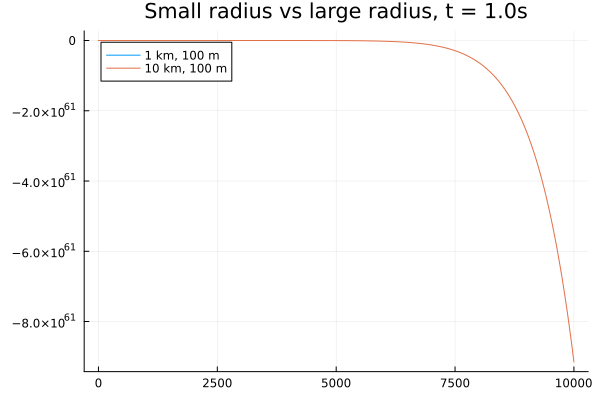

In [41]:
using Plots

anim = @animate for i in 1:length(t)
    plot(r1, sol1[i], label="1 km, 100 m", title = "Small radius vs large radius, t = $(t[i])s", legend=:topleft)
    plot!(r2, sol2[i], label="10 km, 100 m")
end

gif(anim, "halfar_domes.gif", fps=15)

┌ Info: Saved animation to /Users/alexjones/Code/TA3_Evaluation_Resources/climate/halfar_domes2.gif
└ @ Plots /Users/alexjones/.julia/packages/Plots/rz1WP/src/animation.jl:156


Plots.AnimatedGif("/Users/alexjones/Code/TA3_Evaluation_Resources/climate/halfar_domes2.gif")
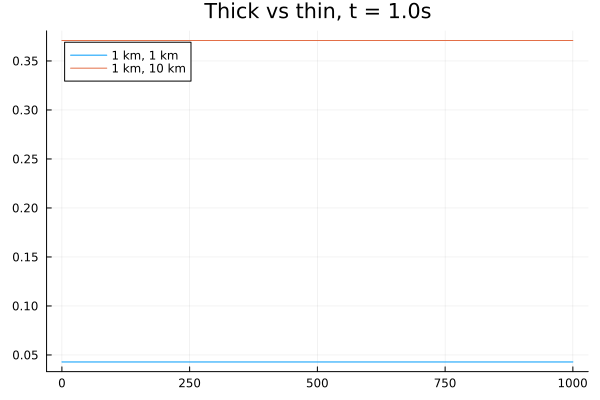

In [42]:
anim = @animate for i in 1:length(t)
    plot(r3, sol3[i], label="1 km, 1 km", title = "Thick vs thin, t = $(t[i])s", legend=:topleft)
    plot!(r4, sol4[i], label="1 km, 10 km")
end

gif(anim, "halfar_domes2.gif", fps=15)